# Package Import

In [ ]:
## Colab 한글 폰트 설치 / 실행 후 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os
os.chdir('/content/drive/MyDrive/K-Water/Daejeon')
os.getcwd()

'/content/drive/MyDrive/K-Water/Daejeon'

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# 댐 / 하천 / 강수량 정보

```
- 만년교 -> 가수원교
- 한밭대교 -> 인창교

@ 하천 정보
- 3009670 / 대전시(만년교)
- 3009665 / 대전시(가수원교)

- 3009673 / 대전시(한밭대교)
- 3009640 / 대전시(인창교)

@ 강수량 정보
- 30094040 / 대전시(만년교)
- 30094050 / 대전시(인창교)
```

# EDA

In [36]:
df = pd.read_csv('./df.csv', index_col = 0)   # 전처리 완료한 Data 호출
df.reset_index(inplace = True)
df.head()

,ymdhm,ecpc,inf,sfw,tototf,wl_3009675,fw_3009675,wl_3009673,fw_3009673,wl_3009665,...,wl_3009640,fw_3009640,rf_30094040,rf_30094020,rf_30094050,datetime,date,year,month,day
0,201301010000,369.12800,16.80400,1039.41000,11.08700,0.24000,8.08000,1.02000,1.79000,1.84000,...,0.77000,0.24000,0.00000,0.00000,0.00000,2013-01-01 00:00:00,2013-01-01,2013,1,1
1,201301010010,369.12800,11.44300,1039.41000,12.34600,0.24000,8.08000,1.06000,2.64000,1.84000,...,0.77000,0.24000,0.00000,0.00000,0.00000,2013-01-01 00:10:00,2013-01-01,2013,1,1
2,201301010020,369.12800,11.92100,1039.41000,12.33000,0.24000,8.08000,1.06000,2.64000,1.84000,...,0.77000,0.24000,0.00000,0.00000,0.00000,2013-01-01 00:20:00,2013-01-01,2013,1,1
3,201301010030,369.12800,12.32800,1039.41000,12.30700,0.24000,8.08000,1.07000,2.89000,1.84000,...,0.77000,0.24000,0.00000,0.00000,0.00000,2013-01-01 00:30:00,2013-01-01,2013,1,1
4,201301010040,369.12800,12.32300,1039.41000,12.33100,0.24000,8.08000,1.07000,2.89000,1.84000,...,0.77000,0.24000,0.00000,0.00000,0.00000,2013-01-01 00:40:00,2013-01-01,2013,1,1


## 전체적인 수위 분포 확인

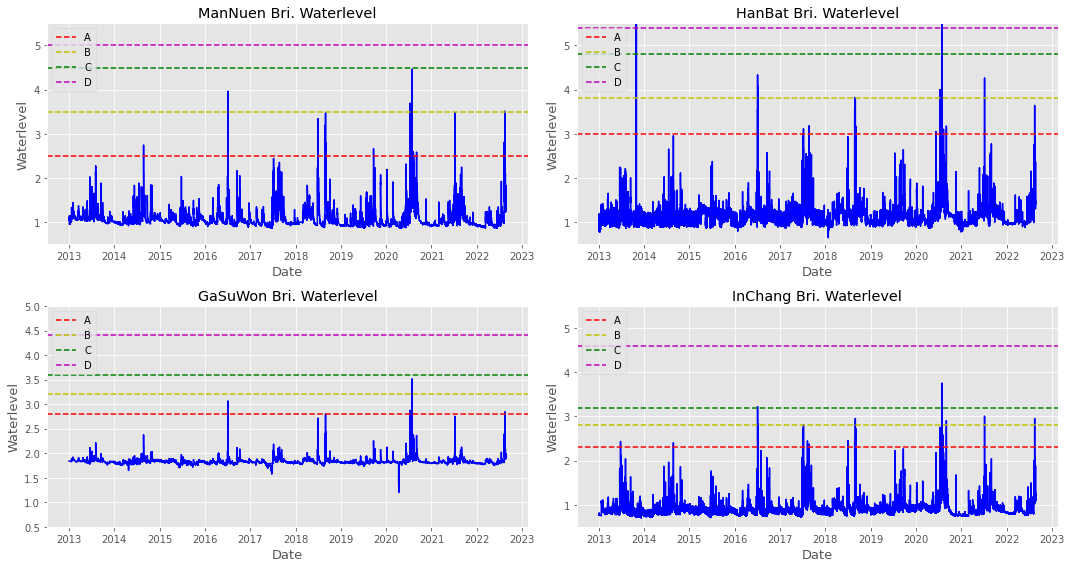

In [ ]:
## 다리 별 수위 Data 시각화

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
plt.style.use('ggplot')
# plt.rc('font', family = 'NanumBarunGothic')

fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()

df['date'] = pd.to_datetime(df['date'])

plt.subplot(2, 2, 1)
plt.plot(df['date'], df['wl_3009670'], color = 'blue')           # label = '만년교'
plt.axhline(y = 2.5, color = 'r', linestyle = '--', label = 'A') # 만년교 수위 : 관심
plt.axhline(y = 3.5, color = 'y', linestyle = '--', label = 'B') # 만년교 수위 : 주의
plt.axhline(y = 4.5, color = 'g', linestyle = '--', label = 'C') # 만년교 수위 : 경계
plt.axhline(y = 5.0, color = 'm', linestyle = '--', label = 'D') # 만년교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("ManNuen Bri. Waterlevel")

plt.subplot(2, 2, 2)
plt.plot(df['date'], df['wl_3009673'], color = 'blue')           # label = '한밭대교'
plt.axhline(y = 3.0, color = 'r', linestyle = '--', label = 'A') # 한밭대교 수위 : 관심
plt.axhline(y = 3.8, color = 'y', linestyle = '--', label = 'B') # 한밭대교 수위 : 주의
plt.axhline(y = 4.8, color = 'g', linestyle = '--', label = 'C') # 한밭대교 수위 : 경계
plt.axhline(y = 5.4, color = 'm', linestyle = '--', label = 'D') # 한밭대교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("HanBat Bri. Waterlevel")

plt.subplot(2, 2, 3)
plt.plot(df['date'], df['wl_3009665'], color = 'blue')           # label = '가수원교'
plt.axhline(y = 2.8, color = 'r', linestyle = '--', label = 'A') # 가수원교 수위 : 관심
plt.axhline(y = 3.2, color = 'y', linestyle = '--', label = 'B') # 가수원교 수위 : 주의
plt.axhline(y = 3.6, color = 'g', linestyle = '--', label = 'C') # 가수원교 수위 : 경계
plt.axhline(y = 4.4, color = 'm', linestyle = '--', label = 'D') # 가수원교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.0)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("GaSuWon Bri. Waterlevel")

plt.subplot(2, 2, 4)
plt.plot(df['date'], df['wl_3009640'], color = 'blue')           # label = '인창교'
plt.axhline(y = 2.3, color = 'r', linestyle = '--', label = 'A') # 인창교 수위 : 관심
plt.axhline(y = 2.8, color = 'y', linestyle = '--', label = 'B') # 인창교 수위 : 주의
plt.axhline(y = 3.2, color = 'g', linestyle = '--', label = 'C') # 인창교 수위 : 경계
plt.axhline(y = 4.6, color = 'm', linestyle = '--', label = 'D') # 인창교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("InChang Bri. Waterlevel")

plt.tight_layout()
plt.show()

In [ ]:
df_summer = df[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8)]  # 강수량이 가장 많이 관측된 달만 추출
df_summer.reset_index(inplace = True, drop = True)
df_summer

,ymdhm,ecpc,inf,sfw,tototf,wl_3009675,fw_3009675,wl_3009673,fw_3009673,wl_3009665,...,wl_3009640,fw_3009640,rf_30094040,rf_30094020,rf_30094050,datetime,date,year,month,day
0,201306010000,648.513,35.347,760.025,16.752,0.18,2.77,0.96,0.89,1.85,...,0.84,0.49,0.0,0.0,0.0,2013-06-01 00:00:00,2013-06-01,2013,6,1
1,201306010010,648.513,16.679,760.025,16.550,0.18,2.77,0.94,0.67,1.85,...,0.84,0.49,0.0,0.0,0.0,2013-06-01 00:10:00,2013-06-01,2013,6,1
2,201306010020,648.513,16.641,760.025,16.620,0.18,2.77,0.94,0.67,1.85,...,0.84,0.49,0.0,0.0,0.0,2013-06-01 00:20:00,2013-06-01,2013,6,1
3,201306010030,648.513,16.602,760.025,16.637,0.18,2.77,0.93,0.58,1.85,...,0.84,0.49,0.0,0.0,0.0,2013-06-01 00:30:00,2013-06-01,2013,6,1
4,201306010040,648.513,16.614,760.025,16.584,0.18,2.77,0.94,0.67,1.85,...,0.84,0.49,0.0,0.0,0.0,2013-06-01 00:40:00,2013-06-01,2013,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131378,202208242310,391.464,111.316,1045.605,124.582,0.49,65.22,1.45,21.82,1.91,...,1.17,2.46,0.0,0.0,0.0,2022-08-24 23:10:00,2022-08-24,2022,8,24
131379,202208242320,391.464,111.201,1045.605,124.559,0.49,65.22,1.45,21.82,1.91,...,1.17,2.46,0.0,0.0,0.0,2022-08-24 23:20:00,2022-08-24,2022,8,24
131380,202208242330,391.439,124.573,1045.629,124.580,0.49,65.22,1.45,21.82,1.91,...,1.17,2.46,0.0,0.0,0.0,2022-08-24 23:30:00,2022-08-24,2022,8,24
131381,202208242340,391.439,137.984,1045.629,124.481,0.49,65.22,1.45,21.82,1.91,...,1.17,2.46,0.0,0.0,0.0,2022-08-24 23:40:00,2022-08-24,2022,8,24


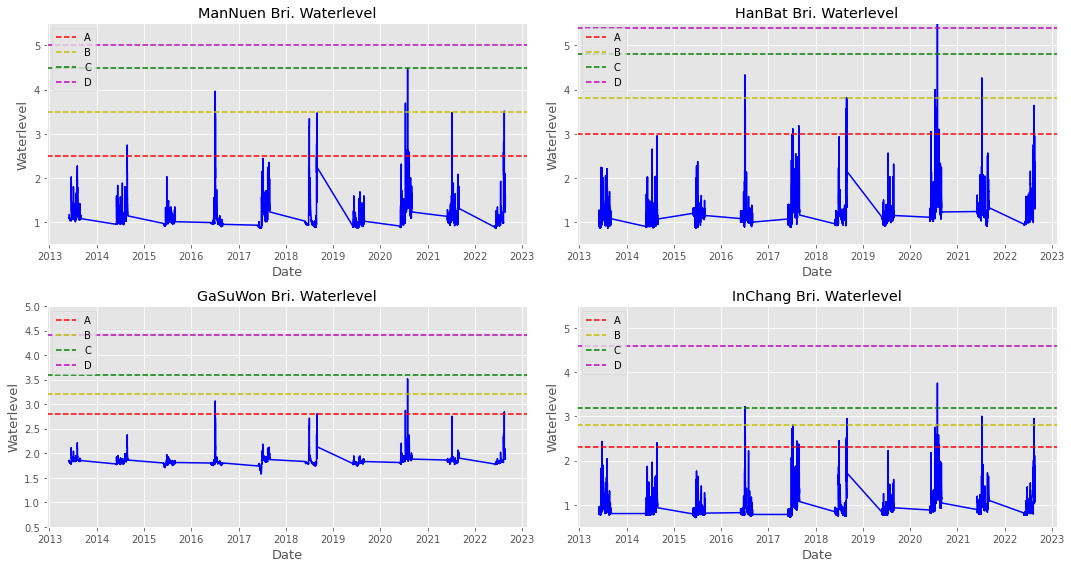

In [ ]:
## 6,7,8월 다리 별 수위 Data 시각화

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
plt.style.use('ggplot')
# plt.rc('font', family = 'NanumBarunGothic')

fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()

df_summer['date'] = pd.to_datetime(df_summer['date'])

plt.subplot(2, 2, 1)
plt.plot(df_summer['date'], df_summer['wl_3009670'], color = 'blue') # label = '만년교'
plt.axhline(y = 2.5, color = 'r', linestyle = '--', label = 'A') # 만년교 수위 : 관심
plt.axhline(y = 3.5, color = 'y', linestyle = '--', label = 'B') # 만년교 수위 : 주의
plt.axhline(y = 4.5, color = 'g', linestyle = '--', label = 'C') # 만년교 수위 : 경계
plt.axhline(y = 5.0, color = 'm', linestyle = '--', label = 'D') # 만년교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("ManNuen Bri. Waterlevel")

plt.subplot(2, 2, 2)
plt.plot(df_summer['date'], df_summer['wl_3009673'], color = 'blue') # label = '한밭대교'
plt.axhline(y = 3.0, color = 'r', linestyle = '--', label = 'A') # 한밭대교 수위 : 관심
plt.axhline(y = 3.8, color = 'y', linestyle = '--', label = 'B') # 한밭대교 수위 : 주의
plt.axhline(y = 4.8, color = 'g', linestyle = '--', label = 'C') # 한밭대교 수위 : 경계
plt.axhline(y = 5.4, color = 'm', linestyle = '--', label = 'D') # 한밭대교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("HanBat Bri. Waterlevel")

plt.subplot(2, 2, 3)
plt.plot(df_summer['date'], df_summer['wl_3009665'], color = 'blue') # label = 'GaSuWon Bri.'
plt.axhline(y = 2.8, color = 'r', linestyle = '--', label = 'A') # 가수원교 수위 : 관심
plt.axhline(y = 3.2, color = 'y', linestyle = '--', label = 'B') # 가수원교 수위 : 주의
plt.axhline(y = 3.6, color = 'g', linestyle = '--', label = 'C') # 가수원교 수위 : 경계
plt.axhline(y = 4.4, color = 'm', linestyle = '--', label = 'D') # 가수원교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.0)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("GaSuWon Bri. Waterlevel")

plt.subplot(2, 2, 4)
plt.plot(df_summer['date'], df_summer['wl_3009640'], color = 'blue') # label = 'InChang Bri.'
plt.axhline(y = 2.3, color = 'r', linestyle = '--', label = 'A') # 인창교 수위 : 관심
plt.axhline(y = 2.8, color = 'y', linestyle = '--', label = 'B') # 인창교 수위 : 주의
plt.axhline(y = 3.2, color = 'g', linestyle = '--', label = 'C') # 인창교 수위 : 경계
plt.axhline(y = 4.6, color = 'm', linestyle = '--', label = 'D') # 인창교 수위 : 심각
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('Date', size = 13)
plt.ylabel('Waterlevel', size = 13)
plt.title("InChang Bri. Waterlevel")

plt.tight_layout()
plt.show()

## 강수량 5mm 이상 관측수 확인 / 월별 비교

In [ ]:
df_rf = df[(df['rf_30094040'] >= 5.0) | (df['rf_30094020'] >= 5.0) | (df['rf_30094050'] >= 5.0)]  # 강수량 관측 가능 지역 3곳 -> 강수량 5.0mm 이상 관측된 것만 추출
df_month_group = df_rf.groupby(['month']) # 월 별로 GroupBy
df_rf_group = df_month_group[['rf_30094040', 'rf_30094020', 'rf_30094050']] # 강수량 Data만 추출

df_rain_count = df_rf_group.count()  # 월별 강수량 5.0mm Count
df_rain_count

,rf_30094040,rf_30094020,rf_30094050
month,,,
4,1,1,1
5,10,10,10
6,75,75,75
7,223,223,223
8,185,185,185
9,39,39,39
10,5,5,5
11,3,3,3


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


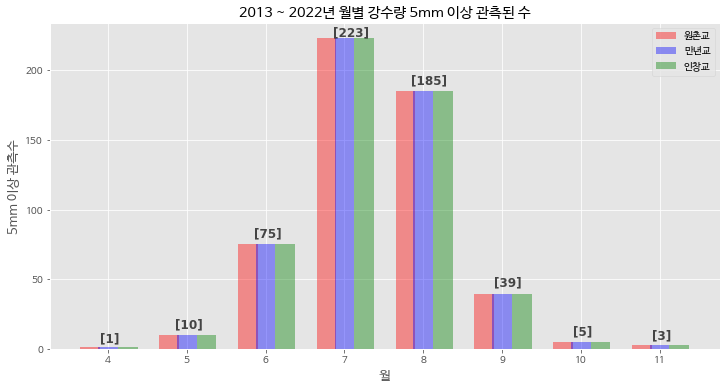

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize = (12, 6))
bar_width = 0.25

# 월이 8개이므로 월을 기준으로 삼음
index = np.arange(8)

# 각 연도별로 3개의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index + bar_width/10, df_rain_count['rf_30094020'], bar_width, alpha = 0.4, color = 'red', label = '원촌교')

b2 = plt.bar(index + bar_width, df_rain_count['rf_30094040'], bar_width, alpha = 0.4, color = 'blue', label = '만년교')

b3 = b2 = plt.bar(index + bar_width*2, df_rain_count['rf_30094050'], bar_width, alpha = 0.4, color = 'green', label = '인창교')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 8 + bar_width, 1), df_rain_count.index)

# Text 보여주기(각 월별 Data의 개수 그래프에 출력)
font = {'family': 'Times New Roman', 'color':  'black', 'weight': 'bold', 'size': 12, 'alpha': 0.7}
plt.text(0.15, 5, df_rain_count[df_rain_count.index == 4]['rf_30094040'].values, fontdict = font)
plt.text(1.1, 15, df_rain_count[df_rain_count.index == 5]['rf_30094040'].values, fontdict = font)
plt.text(2.1, 80, df_rain_count[df_rain_count.index == 6]['rf_30094040'].values, fontdict = font)
plt.text(3.1, 225, df_rain_count[df_rain_count.index == 7]['rf_30094040'].values, fontdict = font)
plt.text(4.1, 190, df_rain_count[df_rain_count.index == 8]['rf_30094040'].values, fontdict = font)
plt.text(5.15, 45, df_rain_count[df_rain_count.index == 9]['rf_30094040'].values, fontdict = font)
plt.text(6.15, 10, df_rain_count[df_rain_count.index == 10]['rf_30094040'].values, fontdict = font)
plt.text(7.15, 7, df_rain_count[df_rain_count.index == 11]['rf_30094040'].values, fontdict = font)

# x축, y축 이름 및 범례 설정
plt.title('2013 ~ 2022년 월별 강수량 5mm 이상 관측된 수')
plt.xlabel('월', size = 13)
plt.ylabel('5mm 이상 관측수', size = 13)
plt.legend()

# plt.savefig('./image/2013_2022_월별_강수량_5mm이상_관측수.png')

plt.show()

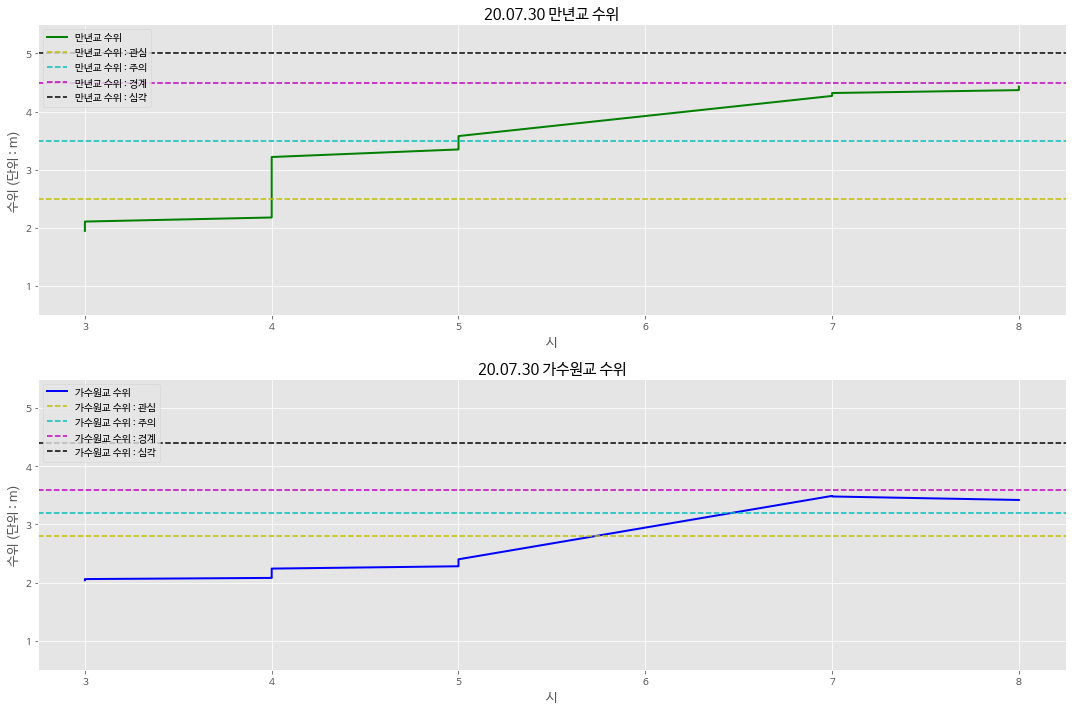

In [ ]:
## 20.07.30 만년교 & 가수원교 수위 시각화
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

df_rf['datetime'] = pd.to_datetime(df_rf['datetime'])
df_rf['date'] = pd.to_datetime(df_rf['date'])
df_rf['hour'] = df_rf['datetime'].dt.hour
df_20200730 = df_rf[df_rf['date'] == '2020-07-30']

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

plt.subplot(2, 1, 1)
plt.plot(df_20200730['hour'], df_20200730['wl_3009670'], label = '만년교 수위', color = 'green', linewidth = 2)
plt.axhline(y = 2.5, color = 'y', linestyle = '--', label = '만년교 수위 : 관심')
plt.axhline(y = 3.5, color = 'c', linestyle = '--', label = '만년교 수위 : 주의')
plt.axhline(y = 4.5, color = 'm', linestyle = '--', label = '만년교 수위 : 경계')
plt.axhline(y = 5.0, color = 'k', linestyle = '--', label = '만년교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("20.07.30 만년교 수위", size = 15)

plt.subplot(2, 1, 2)
plt.plot(df_20200730['hour'], df_20200730['wl_3009665'], label = '가수원교 수위', color = 'blue', linewidth = 2)
plt.axhline(y = 2.8, color = 'y', linestyle = '--', label = '가수원교 수위 : 관심')
plt.axhline(y = 3.2, color = 'c', linestyle = '--', label = '가수원교 수위 : 주의')
plt.axhline(y = 3.6, color = 'm', linestyle = '--', label = '가수원교 수위 : 경계')
plt.axhline(y = 4.4, color = 'k', linestyle = '--', label = '가수원교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("20.07.30 가수원교 수위", size = 15)

plt.tight_layout()

# plt.savefig('./image/만년교_가수원교_수위.png')

plt.show()

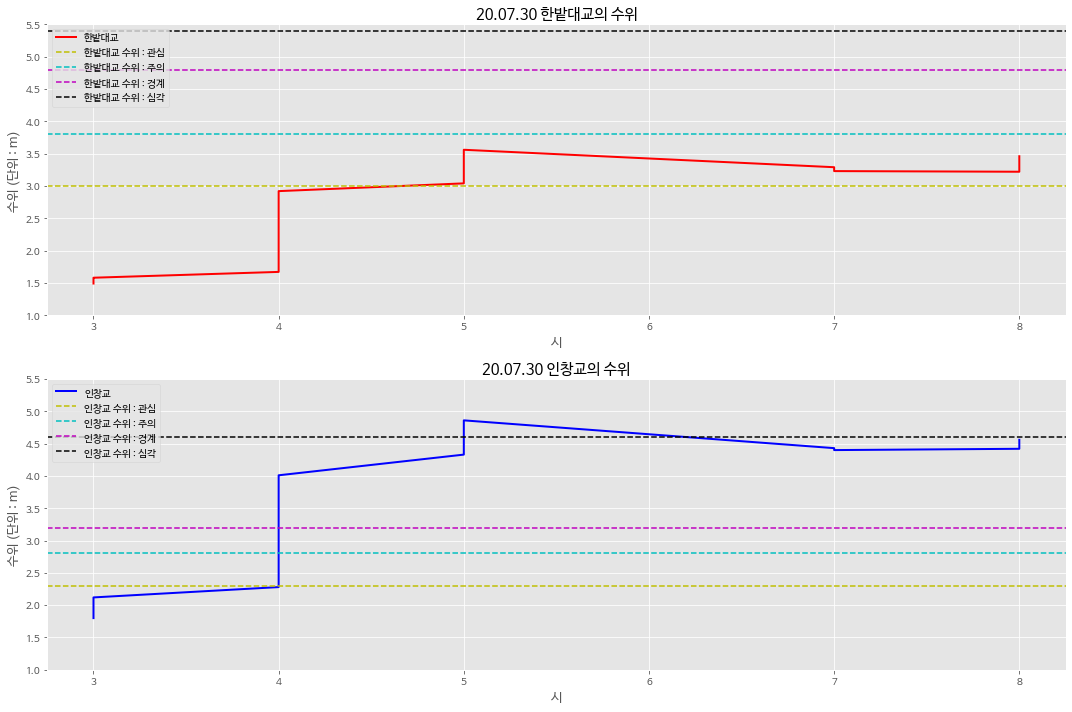

In [ ]:
## 20.07.30 한밭대교 & 인창교 수위 시각화
warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

df_rf['datetime'] = pd.to_datetime(df_rf['datetime'])
df_rf['date'] = pd.to_datetime(df_rf['date'])
df_rf['hour'] = df_rf['datetime'].dt.hour
df_20200730 = df_rf[df_rf['date'] == '2020-07-30']

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

plt.subplot(2, 1, 1)
plt.plot(df_20200730['hour'], df_20200730['wl_3009640'], label = '한밭대교', color = 'red', linewidth = 2)
plt.axhline(y = 3.0, color = 'y', linestyle = '--', label = '한밭대교 수위 : 관심')
plt.axhline(y = 3.8, color = 'c', linestyle = '--', label = '한밭대교 수위 : 주의')
plt.axhline(y = 4.8, color = 'm', linestyle = '--', label = '한밭대교 수위 : 경계')
plt.axhline(y = 5.4, color = 'k', linestyle = '--', label = '한밭대교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(1, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("20.07.30 한밭대교의 수위", size = 15)

plt.subplot(2, 1, 2)
plt.plot(df_20200730['hour'], df_20200730['wl_3009673'], label = '인창교', color = 'blue', linewidth = 2)
plt.axhline(y = 2.3, color = 'y', linestyle = '--', label = '인창교 수위 : 관심')
plt.axhline(y = 2.8, color = 'c', linestyle = '--', label = '인창교 수위 : 주의')
plt.axhline(y = 3.2, color = 'm', linestyle = '--', label = '인창교 수위 : 경계')
plt.axhline(y = 4.6, color = 'k', linestyle = '--', label = '인창교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(1, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("20.07.30 인창교의 수위", size = 15)
 
plt.tight_layout()

# plt.savefig('./image/한밭대교_인창교_수위.png')

plt.show()

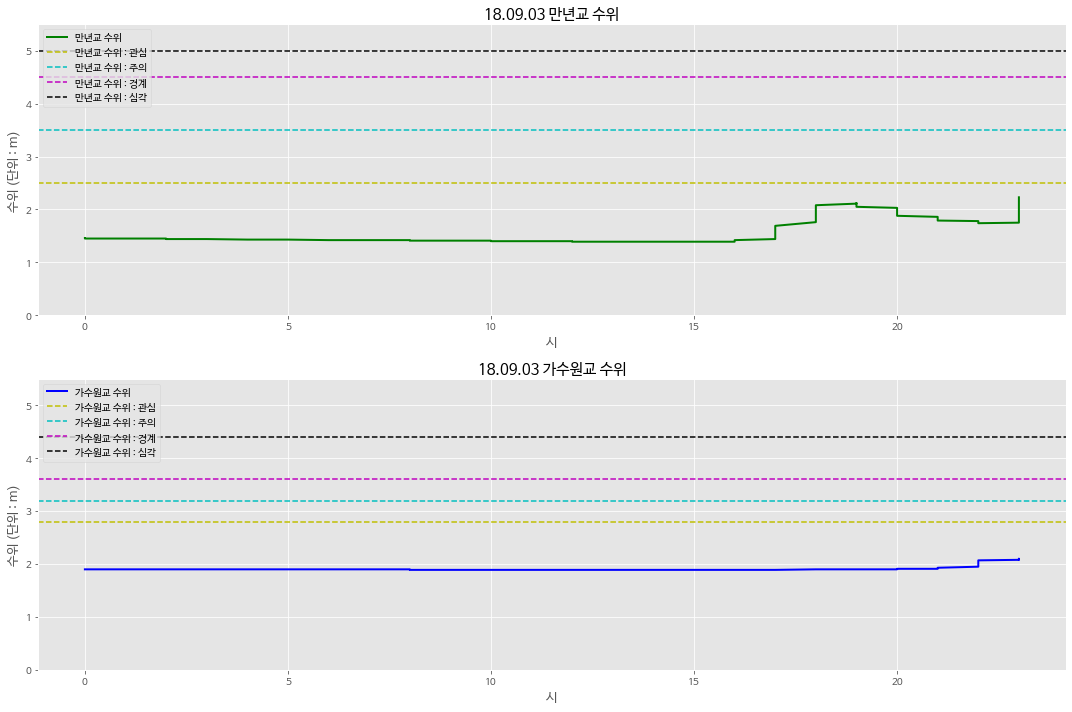

In [ ]:
## 18.09.03 대덕대교 & 가수원교 수위
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

df_180903 = df[298195:298339]
df_180903['datetime'] = pd.to_datetime(df_180903['datetime'])
df_180903['date'] = pd.to_datetime(df_180903['date'])
df_180903['hour'] = df_180903['datetime'].dt.hour

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

plt.subplot(2, 1, 1)
plt.plot(df_180903['hour'], df_180903['wl_3009670'], label = '만년교 수위', color = 'green', linewidth = 2)
plt.axhline(y = 2.5, color = 'y', linestyle = '--', label = '만년교 수위 : 관심')
plt.axhline(y = 3.5, color = 'c', linestyle = '--', label = '만년교 수위 : 주의')
plt.axhline(y = 4.5, color = 'm', linestyle = '--', label = '만년교 수위 : 경계')
plt.axhline(y = 5.0, color = 'k', linestyle = '--', label = '만년교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(0, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("18.09.03 만년교 수위", size = 15)

plt.subplot(2, 1, 2)
plt.plot(df_180903['hour'], df_180903['wl_3009665'], label = '가수원교 수위', color = 'blue', linewidth = 2)
plt.axhline(y = 2.8, color = 'y', linestyle = '--', label = '가수원교 수위 : 관심')
plt.axhline(y = 3.2, color = 'c', linestyle = '--', label = '가수원교 수위 : 주의')
plt.axhline(y = 3.6, color = 'm', linestyle = '--', label = '가수원교 수위 : 경계')
plt.axhline(y = 4.4, color = 'k', linestyle = '--', label = '가수원교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(0, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("18.09.03 가수원교 수위", size = 15)

plt.tight_layout()

# plt.savefig('./image/만년교_가수원교_수위_비교대상.png')

plt.show()

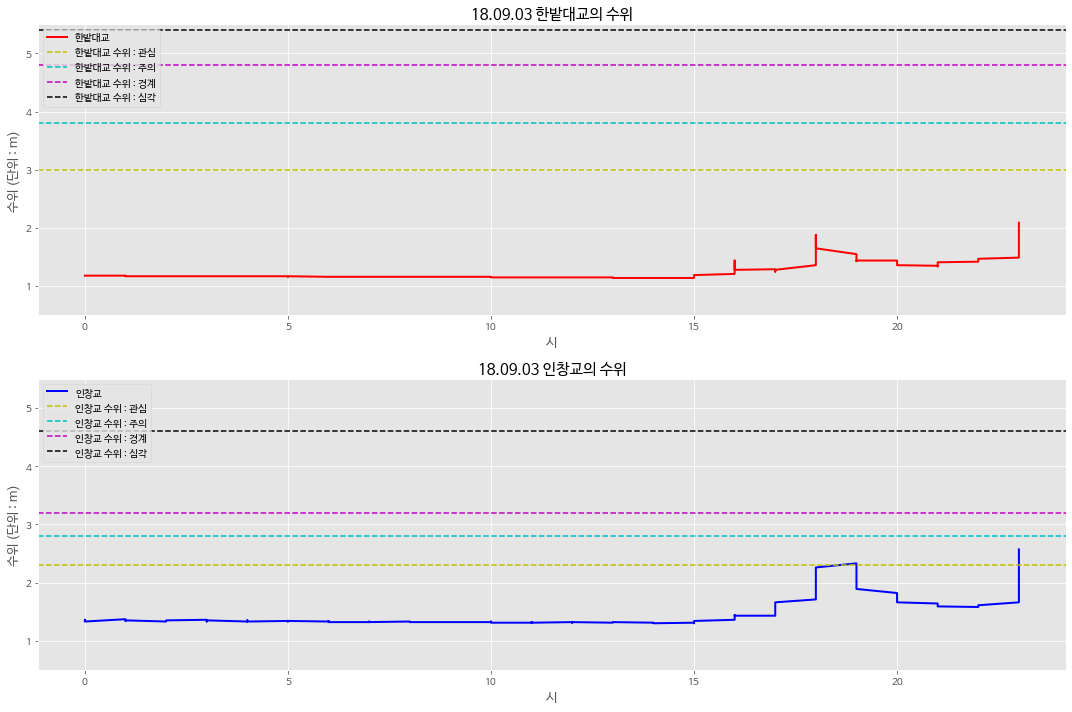

In [ ]:
## 18.09.03 한밭대교 & 인창교 수위

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

df_180903 = df[298195:298339]
df_180903['datetime'] = pd.to_datetime(df_180903['datetime'])
df_180903['date'] = pd.to_datetime(df_180903['date'])
df_180903['hour'] = df_180903['datetime'].dt.hour

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

plt.subplot(2, 1, 1)
plt.plot(df_180903['hour'], df_180903['wl_3009640'], label = '한밭대교', color = 'red', linewidth = 2)
plt.axhline(y = 3.0, color = 'y', linestyle = '--', label = '한밭대교 수위 : 관심')
plt.axhline(y = 3.8, color = 'c', linestyle = '--', label = '한밭대교 수위 : 주의')
plt.axhline(y = 4.8, color = 'm', linestyle = '--', label = '한밭대교 수위 : 경계')
plt.axhline(y = 5.4, color = 'k', linestyle = '--', label = '한밭대교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("18.09.03 한밭대교의 수위", size = 15)

plt.subplot(2, 1, 2)
plt.plot(df_180903['hour'], df_180903['wl_3009673'], label = '인창교', color = 'blue', linewidth = 2)
plt.axhline(y = 2.3, color = 'y', linestyle = '--', label = '인창교 수위 : 관심')
plt.axhline(y = 2.8, color = 'c', linestyle = '--', label = '인창교 수위 : 주의')
plt.axhline(y = 3.2, color = 'm', linestyle = '--', label = '인창교 수위 : 경계')
plt.axhline(y = 4.6, color = 'k', linestyle = '--', label = '인창교 수위 : 심각')
plt.legend(loc = 'upper left')
plt.ylim(0.5, 5.5)
plt.xlabel('시', size = 13)
plt.ylabel('수위 (단위 : m)', size = 13)
plt.title("18.09.03 인창교의 수위", size = 15)
 
plt.tight_layout()

# plt.savefig('./image/한밭대교_인창교_수위_비교대상.png')

plt.show()

## 각 하천 다리별 상관분석(Corr Heatmap)

In [ ]:
df_wl = df_rf.filter(regex = 'wl_')
df_wl = df_wl[['wl_3009680', 'wl_3009675', 'wl_3009670', 'wl_3009665', 'wl_3009673', 'wl_3009640']]
df_wl.columns = ['원촌교 수위', '대덕대교 수위', '만년교 수위', '가수원교 수위', '한밭대교 수위', '인창교 수위']
df_wl.head()

,원촌교 수위,대덕대교 수위,만년교 수위,가수원교 수위,한밭대교 수위,인창교 수위
24233,0.40,0.16,1.05,1.82,1.00,0.77
24234,0.42,0.20,1.08,1.84,1.04,0.77
24235,0.50,0.22,1.17,1.85,1.21,1.20
24290,1.49,0.58,1.94,2.05,2.04,1.57
25290,0.48,0.17,1.10,1.85,1.06,0.94


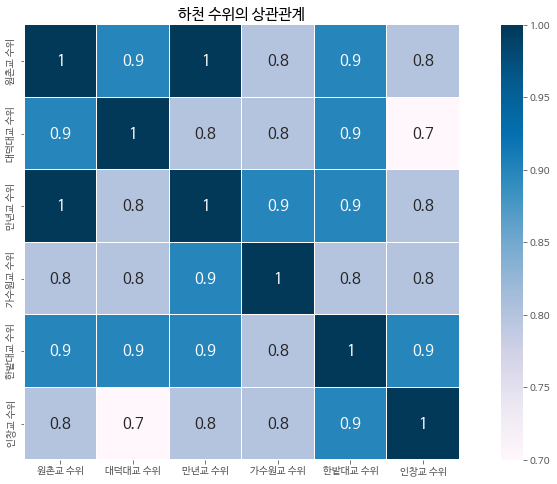

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize = (15, 8))

plt.title('하천 수위의 상관관계', size = 15)
sns.heatmap(df_wl.corr().round(decimals = 1), linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size" : 15})

# plt.savefig('./image/Waterlevel_Corr.png')

# 1번 모델 : `만년교 -> 가수원교`

## Train / Valid / Test Set

In [ ]:
from tqdm import tqdm

# Dataset 만드는 함수 생성
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in tqdm(range(len(data) - window_size)) :
        feature_list.append(np.array(data.iloc[i : i + window_size]))
        label_list.append(np.array(label.iloc[i + window_size]))
    return np.array(feature_list), np.array(label_list)

In [37]:
# 만년교 & 가수원교 Data만 호출
df_gsw = df_summer[['wl_3009670', 'fw_3009670', 'fw_3009665', 'rf_30094040', 'wl_3009665']]

# 데이터 분리
SIZE_2021 = 13243       # 2021년 Data 개수
SIZE_2022 = 12240       # 2022년 ~ 8/24 Data 개수
WINDOW_SIZE = 6         # Window Size

train = df_gsw[: -(SIZE_2021 + SIZE_2022)]               # 2013 ~ 2020년 6,7,8월
valid = df_gsw[-(SIZE_2021 + SIZE_2022) : -SIZE_2022]    # 2021년 6,7,8월
test = df_gsw[-SIZE_2022 :]                              # 2022년 6,7,8월

feature_cols = ['wl_3009670', 'fw_3009670', 'fw_3009665', 'rf_30094040']  # 설명변수
label_cols = ['wl_3009665']  # 예측변수

x_train = train[feature_cols]
y_train = train[label_cols]

x_valid = valid[feature_cols]
y_valid = valid[label_cols]

x_test = test[feature_cols]
y_test = test[label_cols]

x_train, y_train = make_dataset(x_train, y_train, WINDOW_SIZE)
x_valid, y_valid = make_dataset(x_valid, y_valid, WINDOW_SIZE)
x_test, y_test = make_dataset(x_test, y_test, WINDOW_SIZE)

print('\n', 'Train Set : ', x_train.shape, y_train.shape,
      '\n', 'Valid Set : ', x_valid.shape, y_valid.shape,
      '\n', 'Test Set  : ', x_test.shape, y_test.shape)

100%|██████████| 12234/12234 [00:01<00:00, 8150.74it/s]


 Train Set :  (105894, 6, 4) (105894, 1) 
 Valid Set :  (13237, 6, 4) (13237, 1) 
 Test Set  :  (12234, 6, 4) (12234, 1)


## LSTM 모델 학습

### Train Set 학습

In [38]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, TimeDistributed
from keras.callbacks import EarlyStopping, ModelCheckpoint

input_shape = (x_train.shape[1], x_train.shape[2]) # time_step, feature

## 모델 구축
model = Sequential()
model.add(LSTM(256, input_shape = input_shape, activation = 'tanh'))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               267264    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                

In [40]:
import os

# 모델 컴파일
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mape'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 20)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint1.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1,
                             save_best_only = True, mode = 'auto')

history = model.fit(x_train, y_train, epochs = 5, batch_size = 1, shuffle = False,
                    validation_data = (x_valid, y_valid),
                    callbacks = [early_stop, checkpoint])

Epoch 1/5
105889/105894 [============================>.] - ETA: 0s - loss: 3.9495e-04 - mape: 0.2277
Epoch 1: val_loss improved from inf to 0.01089, saving model to model/tmp_checkpoint1.h5
105894/105894 [==============================] - 375s 4ms/step - loss: 3.9493e-04 - mape: 0.2277 - val_loss: 0.0109 - val_mape: 4.8849
Epoch 2/5
105889/105894 [============================>.] - ETA: 0s - loss: 7.1530e-05 - mape: 0.1311
Epoch 2: val_loss improved from 0.01089 to 0.00926, saving model to model/tmp_checkpoint1.h5
105894/105894 [==============================] - 374s 4ms/step - loss: 7.1526e-05 - mape: 0.1311 - val_loss: 0.0093 - val_mape: 4.2493
Epoch 3/5
105892/105894 [============================>.] - ETA: 0s - loss: 3.2011e-05 - mape: 0.1064
Epoch 3: val_loss improved from 0.00926 to 0.00743, saving model to model/tmp_checkpoint1.h5
105894/105894 [==============================] - 373s 4ms/step - loss: 3.2011e-05 - mape: 0.1064 - val_loss: 0.0074 - val_mape: 3.8203
Epoch 4/5
105892/

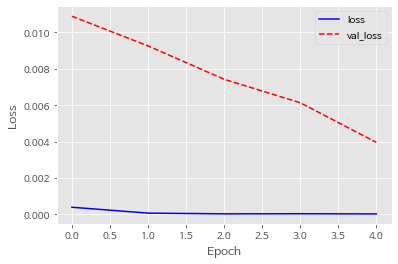

In [41]:
## Epoch에 따른 Loss 시각화 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
model.save('./gsw_lstm_model_e50_b1_l8.h5')

### Test Set 예측

In [ ]:
from keras.models import load_model
model = load_model('./gsw_lstm_model_e50_b1.h5')
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint1.h5')

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 평가 지표 출력 함수 생성
def result_evaluate(y_test, y_pred) :
    RMSE = mean_squared_error(y_test, y_pred, squared = False)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data = [RMSE, MAPE],
                          index = ['RMSE', 'MAPE'],
                          columns = ['Result'])
    return Result

In [45]:
# Train Set 예측
train_pred = model.predict(x_train)
train_result = result_evaluate(y_train, train_pred)
train_result.rename(columns = {'Result' : 'Train_Result'}, inplace = True)

# Test Set 예측
model.load_weights(filename)
y_pred = model.predict(x_test)
test_result = result_evaluate(y_test, y_pred)
test_result.rename(columns = {'Result' : 'Test_Result'}, inplace = True)

# 모델 평가
final_result = pd.concat([train_result, test_result], axis = 1)
final_result

,Train_Result,Test_Result
RMSE,0.07878,0.07521
MAPE,0.02483,0.02583


In [46]:
# 최종 DataFrame 만들기
y_pred_df = pd.DataFrame(y_pred, columns = ['wl_3009665_pred'])

df_2022 = df[-SIZE_2022 : -6]
df_2022.reset_index(inplace = True, drop = True)

df_2022_wl = df_2022[['ymdhm', 'wl_3009665']]
final_df = pd.concat([df_2022, y_pred_df], ignore_index = False, axis = 1)

final_df['datetime'] = pd.to_datetime(final_df['ymdhm'], format = '%Y%m%d%H%M')
final_df['date'] = final_df['datetime'].dt.date
final_df['month'] = final_df['datetime'].dt.month
final_df['time'] = final_df['datetime'].dt.time
final_df['hour'] = final_df['datetime'].dt.hour

final_df = final_df[['month', 'date', 'time', 'hour', 'wl_3009665', 'wl_3009665_pred']]
final_df

,month,date,time,hour,wl_3009665,wl_3009665_pred
0,6,2022-06-01,00:00:00,0,1.78000,1.75450
1,6,2022-06-01,00:10:00,0,1.78000,1.75450
2,6,2022-06-01,00:20:00,0,1.78000,1.75450
3,6,2022-06-01,00:30:00,0,1.78000,1.75450
4,6,2022-06-01,00:40:00,0,1.78000,1.75450
...,...,...,...,...,...,...
12229,8,2022-08-24,22:10:00,22,1.92000,1.90190
12230,8,2022-08-24,22:20:00,22,1.92000,1.90453
12231,8,2022-08-24,22:30:00,22,1.92000,1.90699
12232,8,2022-08-24,22:40:00,22,1.92000,1.90888


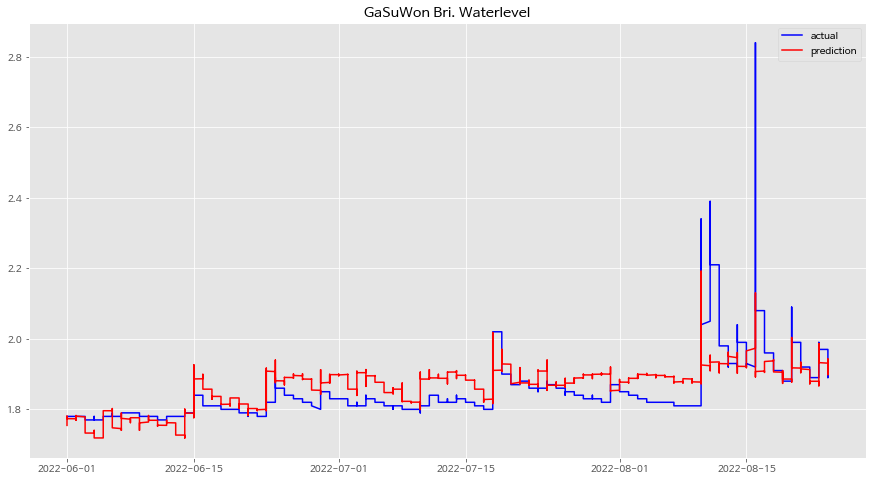

In [47]:
# 시각화
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)

fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()

final_df['date'] = pd.to_datetime(final_df['date'])

ax.plot(final_df['date'], final_df['wl_3009665'], label = 'actual', color = 'blue')
ax.plot(final_df['date'], final_df['wl_3009665_pred'], label = 'prediction', color = 'red')
plt.legend()
plt.title("GaSuWon Bri. Waterlevel")
plt.show()

# 2번 모델 : `대덕대교 -> 인창교`

## Train / Valid / Test Set

In [ ]:
from tqdm import tqdm

# Dataset 만드는 함수 생성
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in tqdm(range(len(data) - window_size)) :
        feature_list.append(np.array(data.iloc[i : i + window_size]))
        label_list.append(np.array(label.iloc[i + window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
# 대덕대교 & 인창교 Data만 호출
df_ic = df_summer[['wl_3009675', 'fw_3009675', 'fw_3009680', 'rf_30094050', 'wl_3009680']]

# 데이터 분리
SIZE_2021 = 13243       # 2021년 Data 개수
SIZE_2022 = 12240       # 2022년 ~ 8/24 Data 개수
WINDOW_SIZE = 6         # Window Size

train = df_ic[: -(SIZE_2021 + SIZE_2022)]               # 2013 ~ 2020년 6,7,8월
valid = df_ic[-(SIZE_2021 + SIZE_2022) : -SIZE_2022]    # 2021년 6,7,8월
test = df_ic[-SIZE_2022 :]                              # 2022년 6,7,8월

feature_cols = ['wl_3009675', 'fw_3009675', 'fw_3009680', 'rf_30094050']  # 설명변수
label_cols = ['wl_3009680']    # 예측변수

x_train = train[feature_cols]
y_train = train[label_cols]

x_valid = valid[feature_cols]
y_valid = valid[label_cols]

x_test = test[feature_cols]
y_test = test[label_cols]

x_train, y_train = make_dataset(x_train, y_train, WINDOW_SIZE)
x_valid, y_valid = make_dataset(x_valid, y_valid, WINDOW_SIZE)
x_test, y_test = make_dataset(x_test, y_test, WINDOW_SIZE)

print('\n', 'Train Set : ', x_train.shape, y_train.shape,
      '\n', 'Valid Set : ', x_valid.shape, y_valid.shape,
      '\n', 'Test Set  : ', x_test.shape, y_test.shape)

100%|██████████| 12234/12234 [00:01<00:00, 7645.02it/s]



 Train Set :  (105894, 6, 4) (105894, 1) 
 Valid Set :  (13237, 6, 4) (13237, 1) 
 Test Set  :  (12234, 6, 4) (12234, 1)


## LSTM 모델 학습

### Train Set 학습

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, TimeDistributed
from keras.callbacks import EarlyStopping, ModelCheckpoint

input_shape = (x_train.shape[1], x_train.shape[2]) # time_step, feature

## 모델 구축
model = Sequential()
model.add(LSTM(256, input_shape = input_shape, activation = 'tanh'))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               267264    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                

In [ ]:
import os

# 모델 컴파일
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mape'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 20)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint2.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1,
                             save_best_only = True, mode = 'auto')

history = model.fit(x_train, y_train, epochs = 50, batch_size = 1, shuffle = False,
                    validation_data = (x_valid, y_valid),
                    callbacks = [early_stop, checkpoint])

In [ ]:
## Epoch에 따른 Loss 시각화 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('./ic_lstm_model_e40_b1.h5')

### Test Set 예측

In [ ]:
from keras.models import load_model
model = load_model('./ic_lstm_model_e40_b1.h5')
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint2.h5')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 평가 지표 출력 함수 생성
def result_evaluate(y_test, y_pred) :
    RMSE = mean_squared_error(y_test, y_pred, squared = False)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data = [RMSE, MAPE],
                          index = ['RMSE', 'MAPE'],
                          columns = ['Result'])
    return Result

In [ ]:
# Train Set 예측
train_pred = model.predict(x_train)
train_result = result_evaluate(y_train, train_pred)
train_result.rename(columns = {'Result' : 'Train_Result'}, inplace = True)

# Test Set 예측
# model.load_weights(filename)
y_pred = model.predict(x_test)
test_result = result_evaluate(y_test, y_pred)
test_result.rename(columns = {'Result' : 'Test_Result'}, inplace = True)

# 모델 평가
final_result = pd.concat([train_result, test_result], axis = 1)
final_result

,Train_Result,Test_Result
RMSE,0.20675,0.21605
MAPE,0.11643,0.28574


In [ ]:
# 최종 DataFrame 만들기
y_pred_df = pd.DataFrame(y_pred, columns = ['wl_3009680_pred'])

df_2022 = df[-SIZE_2022 : -6]
df_2022.reset_index(inplace = True, drop = True)

df_2022_wl = df_2022[['ymdhm', 'wl_3009680']]
final_df = pd.concat([df_2022, y_pred_df], ignore_index = False, axis = 1)

final_df['datetime'] = pd.to_datetime(final_df['ymdhm'], format = '%Y%m%d%H%M')
final_df['date'] = final_df['datetime'].dt.date
final_df['month'] = final_df['datetime'].dt.month
final_df['time'] = final_df['datetime'].dt.time
final_df['hour'] = final_df['datetime'].dt.hour

final_df = final_df[['month', 'date', 'time', 'hour', 'wl_3009680', 'wl_3009680_pred']]
final_df

,month,date,time,hour,wl_3009680,wl_3009680_pred
0,6,2022-06-01,00:00:00,0,0.40000,0.57746
1,6,2022-06-01,00:10:00,0,0.40000,0.57746
2,6,2022-06-01,00:20:00,0,0.40000,0.57746
3,6,2022-06-01,00:30:00,0,0.40000,0.57746
4,6,2022-06-01,00:40:00,0,0.40000,0.57746
...,...,...,...,...,...,...
12229,8,2022-08-24,22:10:00,22,0.75000,0.83989
12230,8,2022-08-24,22:20:00,22,0.75000,0.82988
12231,8,2022-08-24,22:30:00,22,0.75000,0.83033
12232,8,2022-08-24,22:40:00,22,0.75000,0.83033


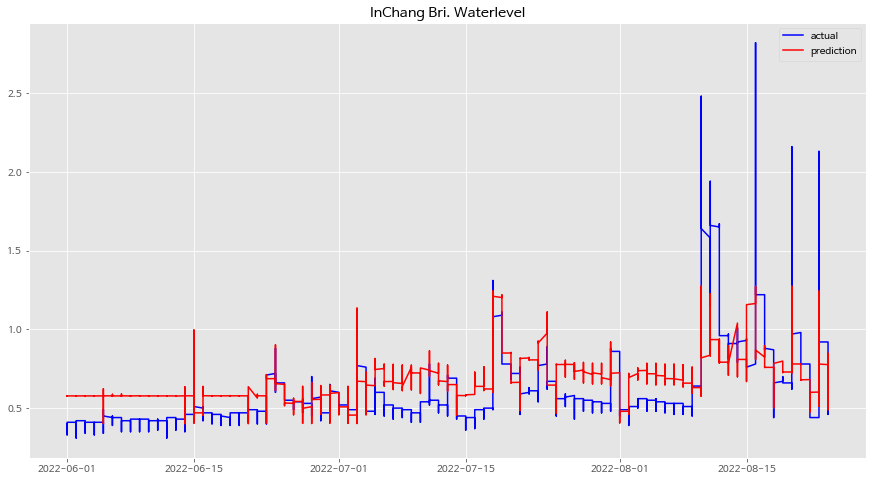

In [ ]:
# 시각화
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)

fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot()

final_df['date'] = pd.to_datetime(final_df['date'])

ax.plot(final_df['date'], final_df['wl_3009680'], label = 'actual', color = 'blue')
ax.plot(final_df['date'], final_df['wl_3009680_pred'], label = 'prediction', color = 'red')
plt.legend()
plt.title("InChang Bri. Waterlevel")
plt.show()